# Universidad Nacional de San Agustin
# Escuela Profesional de Ingenieria en Telecomunicaciones
# Telefonia Celular
# Laboratorio 1 

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Markdown
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px

## Funciones utiles

In [2]:

def calcular_distancia(FSPL_dB, f):
    """
    Calcula la distancia en metros dado FSPL en dB y frecuencia en Hz.
    
    :param FSPL_dB: Pérdida por espacio libre en dB
    :param f: Frecuencia en Hz
    :return: Distancia en kilometros
    """
    d = 10 ** ((FSPL_dB - 20 * math.log10(f) - 32.44) / 20)
    return d   # Resultado en kilometros


## Parámetros Utilizados

In [3]:
# Definir la altura del receptor y su posición
h_rb = 40  # Altura en metros del receptor
p_rb = np.array([0, 0, h_rb])  # Punto receptor fijo (esto es el centro)

# Generar una matriz de posiciones de emisores centrada alrededor del receptor
x, y = np.meshgrid(np.arange(-20, 21), np.arange(-20, 21))
p_em = np.column_stack((x.ravel(), y.ravel(), 1.5 * np.ones(x.size)))  # Emisores a 1.5 m de altura

# Restar las coordenadas del receptor a las posiciones del transmisor para centrar
p_em[:, 0:2] += p_rb[0:2]

# Parámetros de transmisión y enlace
Ptx = 42  # Potencia de transmisión en dBm
Gtx = 18  # Máxima ganancia de la antena transmisora en dBm
Grx = 0  # Ganancia de la antena receptora en dBm
f = 2100  # Frecuencia en MHz›
Margin = 0  # Margen de enlace en dB
c = 2.998e8  # Velocidad de la luz en m/s
L_pl = 0  # Pérdidas adicionales
L_cerb = 2 + 2  # 2 dB por cables y 2 dB por combinador
s_em = -106 # Sensibilidad del receptor en dBm

### a. Gráfica de las posiciones de el transmisor y el receptor

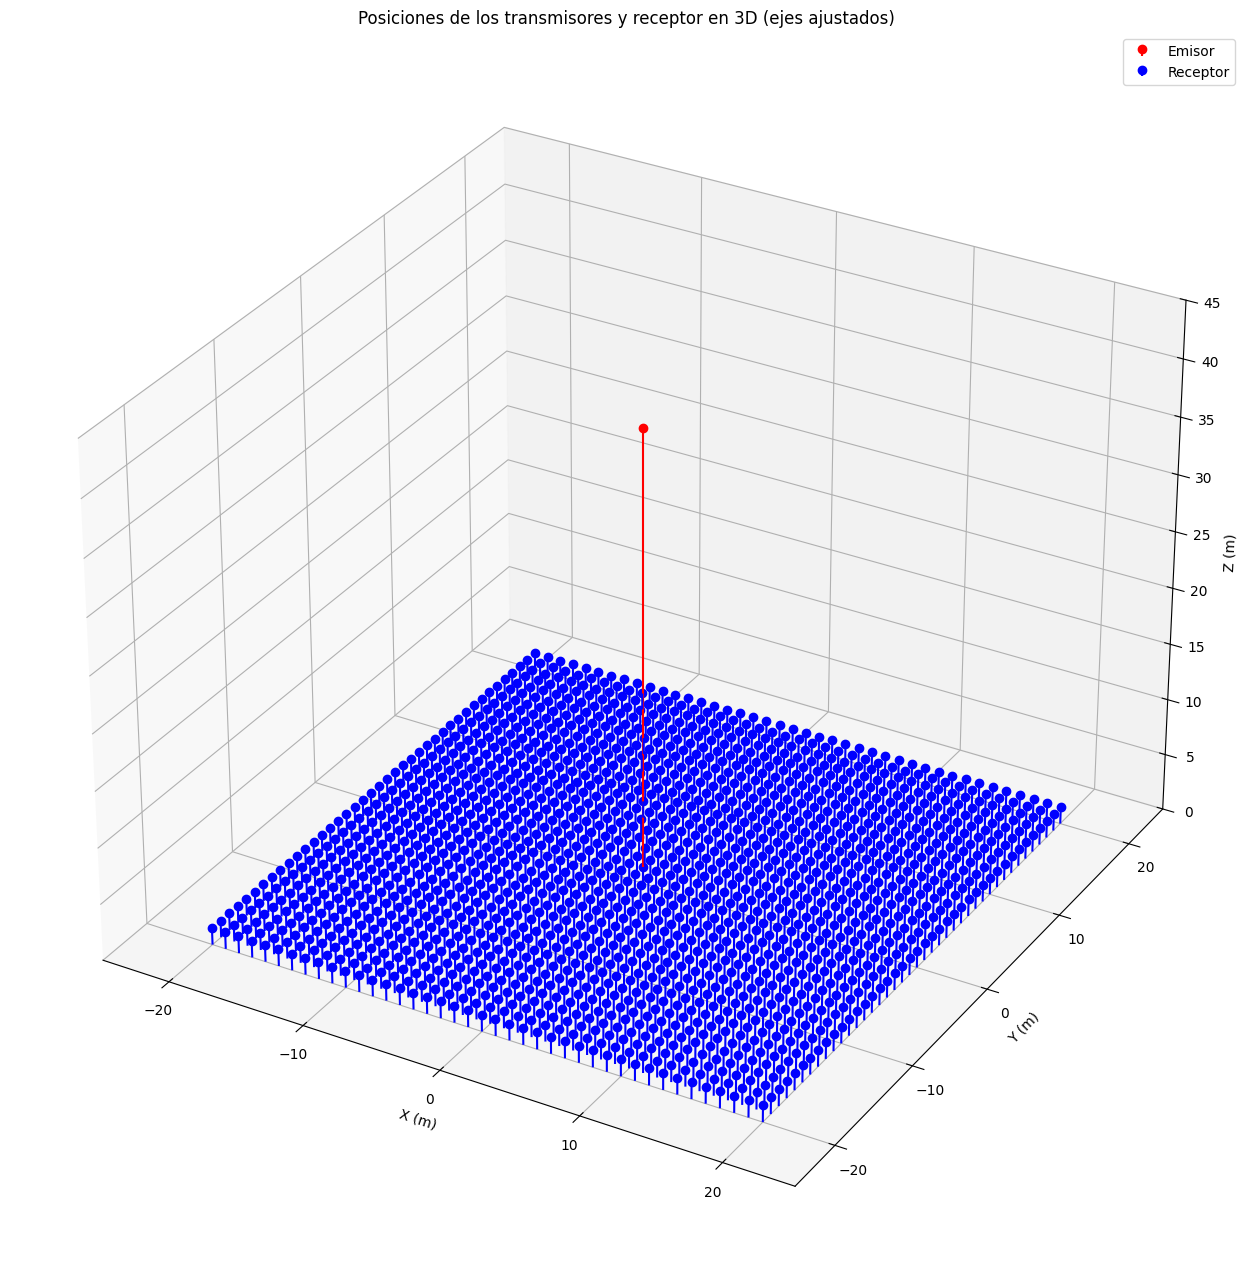

In [4]:
fig = plt.figure(figsize=(16, 16))
ax = fig.add_subplot(111, projection='3d')

# Separación de ejes ajustada para que los puntos se vean más separados
ax.stem([p_rb[0]], [p_rb[1]], [p_rb[2]], linefmt='r-', markerfmt='ro', basefmt=' ', label='Emisor')
ax.stem(p_em[:, 0], p_em[:, 1], p_em[:, 2], linefmt='b-', markerfmt='bo', basefmt=' ', label='Receptor')

# Ajustar los límites de los ejes para una mejor visualización
ax.set_xlim(-25, 25)
ax.set_ylim(-25, 25)
ax.set_zlim(0, 45)

# Etiquetas y título
ax.set_xlabel('X (m)')
ax.set_ylabel('Y (m)')
ax.set_zlabel('Z (m)')
ax.set_title('Posiciones de los transmisores y receptor en 3D (ejes ajustados)')

plt.grid(True)
plt.legend()
plt.show()


### b. Cálculo de la distancia, perdida por espacio libre, perdida total y potencia recibida de cada usuario

In [5]:
# Calcular la distancia entre cada transmisor y el receptor
d = np.sqrt(np.sum((p_em - p_rb) ** 2, axis=1))

# Cálculo vectorizado de las pérdidas en el espacio libre (L_fsl)
L_fsl = 20 * np.log10(d) + 20 * np.log10(f) + 20 * np.log10(4 * np.pi / c)
# Cálculo vectorizado de las pérdidas totales (L)
L_total = L_fsl + L_pl + Margin
# Cálculo vectorizado de la potencia recibida (Prx)
Prx = Ptx + Gtx - L_total + Grx

# Mostrar las primeras 10 potencias recibidas
markdown_output_prx = "# Resultados para las primeras 10 potencias recibidas\n\n"
markdown_output_prx += (
    "|Usuario| Distancia (km) | L_fsl (dB) | L_total (dB) | Potencia Recibida (dBm) |\n"
)
markdown_output_prx += (
    "|-------|----------------|------------|--------------|-------------------------|\n"
)

# Generar las filas de la tabla con los resultados
for i in range(10):
    markdown_output_prx += f"| {i+1} | {d[i]:.4f} | {L_fsl[i]:.4f} | {L_total[i]:.2f} | {Prx[i]:.2f} |\n"

# Mostrar la tabla
display(Markdown(markdown_output_prx))

# Resultados para las primeras 10 potencias recibidas

|Usuario| Distancia (km) | L_fsl (dB) | L_total (dB) | Potencia Recibida (dBm) |
|-------|----------------|------------|--------------|-------------------------|
| 1 | 47.7729 | -47.5244 | -47.52 | 107.52 |
| 2 | 47.3630 | -47.5993 | -47.60 | 107.60 |
| 3 | 46.9707 | -47.6715 | -47.67 | 107.67 |
| 4 | 46.5967 | -47.7410 | -47.74 | 107.74 |
| 5 | 46.2412 | -47.8075 | -47.81 | 107.81 |
| 6 | 45.9048 | -47.8709 | -47.87 | 107.87 |
| 7 | 45.5878 | -47.9311 | -47.93 | 107.93 |
| 8 | 45.2907 | -47.9879 | -47.99 | 107.99 |
| 9 | 45.0139 | -48.0411 | -48.04 | 108.04 |
| 10 | 44.7577 | -48.0907 | -48.09 | 108.09 |


#### Grafica de la potencia recibida

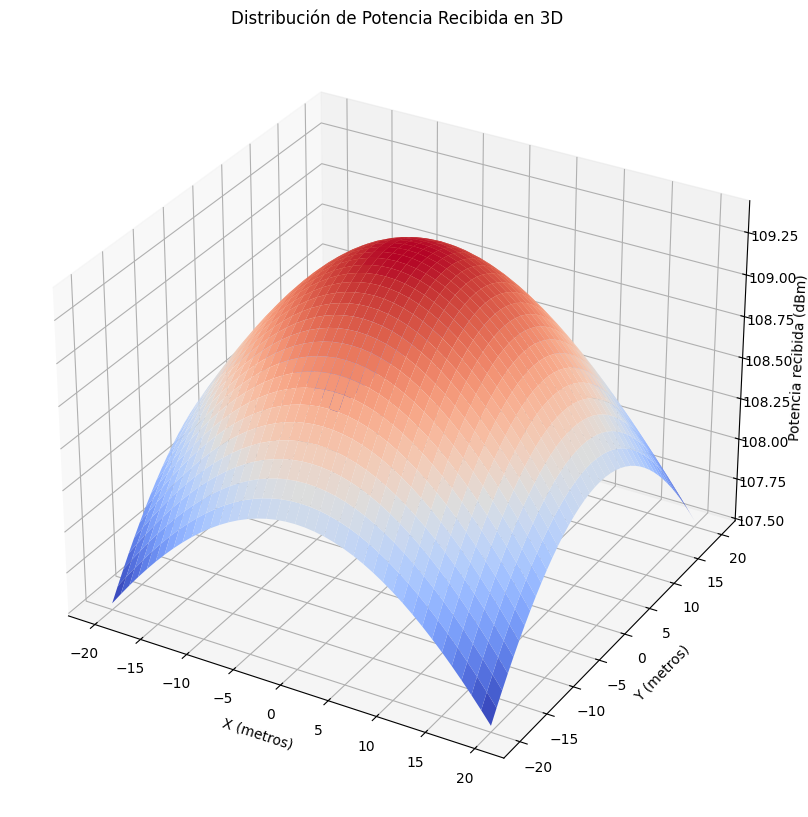

In [6]:
# Crear una gráfica 3D para la potencia recibida
fig = plt.figure(figsize=(10, 12))
ax = fig.add_subplot(111, projection='3d')

# Reshapear la potencia para graficar
Prx_reshaped = Prx.reshape(x.shape)

# Graficar superficie de potencia recibida
ax.plot_surface(x, y, Prx_reshaped, cmap='coolwarm', edgecolor='none')

# Configuraciones de la gráfica
ax.set_xlabel('X (metros)')
ax.set_ylabel('Y (metros)')
ax.set_zlabel('Potencia recibida (dBm)')
ax.set_title('Distribución de Potencia Recibida en 3D')

plt.show()

#### Calculo de la perdida maxima por el emisor

In [7]:
# Calculamos la perdida maxima por emisor
L_max = Ptx + Gtx + Grx - s_em
print("La perdida maxima por emisor es:", L_max, "dB")

# Calculamos para que distancia se dio la perdida maxima con la funcion calcular_distancia
d_max = calcular_distancia(L_max, f)

# Distancia en kilometros
print(f'La distancia es: {d_max} km')

# Ahora si le agregamos las otras perdidas tenemos lo siguiente 
L_fsl_max = L_max - L_pl - L_cerb - Margin
print("La perdida maxima por emisor con la perdida en el combinador y cable es:", L_fsl_max, "dB")

# Calculamos para que distancia se dio la perdida maxima con la funcion calcular_distancia
d_max = calcular_distancia(L_fsl_max, f)

# Distancia en kilometros
print(f'La distancia es: {d_max} km')


La perdida maxima por emisor es: 166 dB
La distancia es: 2268.7189847876966 km
La perdida maxima por emisor con la perdida en el combinador y cable es: 162 dB
La distancia es: 1431.4649060134445 km


## Aplicación de la Recomendación ITU F.1336 para el patrón de radiación de la antena omnidireccional

## Ecuaciones de Ganancia de la Antena

### Fórmula de Ganancia


$$
G(\theta) =
\begin{cases}
G_0 - 12 \left( \frac{\theta}{\theta_3} \right)^2 & \text{para } 0 \leq |\theta| < \theta_4 \\
G_0 - 12 + 10 \log(k + 1) & \text{para } \theta_4 \leq |\theta| < \theta_3 \\
G_0 - 12 + 10 \log \left[ \left( \frac{|\theta|}{\theta_3} \right)^{-1.5} + k \right] & \text{para } \theta_3 \leq |\theta| \leq 90^\circ
\end{cases}
\tag{1a}
$$

### Definición de los parámetros:

$$
\theta_3 = 107.6 \times 10^{-0.1 G_0} \tag{1b}
$$

$$
\theta_4 = \theta_3 \sqrt{1 - \frac{1}{1.2} \log(k + 1)} \tag{1c}
$$

In [8]:
# Calcular la ganancia en función de theta
G_0 = 18  # Máxima ganancia en el plano acimutal (dBi)
k = 0  # Parámetro de aumento de lóbulos laterales
theta_3 = 107.6 * 10 ** (-0.1 * G_0)
theta_4 = theta_3 * np.sqrt(1 - np.log10(k + 1) / 1.2)

def calculate_G(theta, G_0, k, theta_3, theta_4):
    theta_abs = np.abs(theta)
    if theta_abs < theta_4:
        return G_0 - 12 * (theta_abs / theta_3) ** 2
    elif theta_abs < theta_3:
        return G_0 - 12 + 10 * np.log10(k + 1)
    elif theta_abs <= 90:
        return G_0 - 12 + 10 * np.log10((theta_abs / theta_3) ** -1.5 + k)
    else:
        return -100  # Valor arbitrario para ángulos fuera de rango

### Grafica de prueba para los angulos

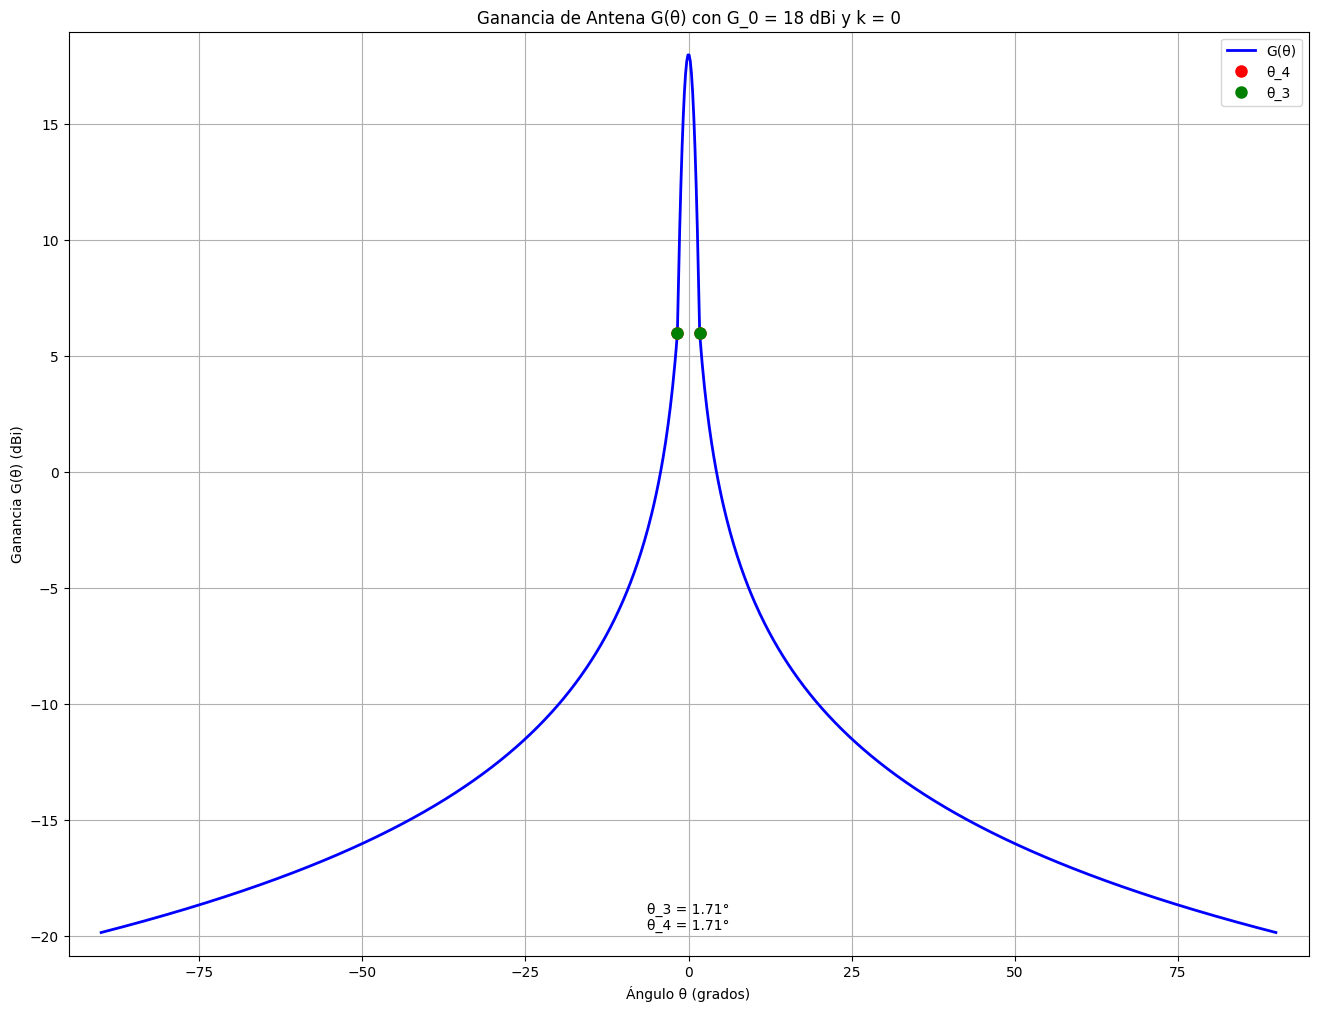

In [9]:
# Crear un vector de ángulos de -90 a 90 grados solo para visualizar la grafica
theta = np.linspace(-90, 90, 1000)

# Calcular G(theta) para cada ángulo
G = np.array([calculate_G(t, G_0, k, theta_3, theta_4) for t in theta])

# Graficar la ganancia en función de theta
plt.figure(figsize=(16, 12))
plt.plot(theta, G, "b-", linewidth=2, label="G(θ)")
plt.grid(True)

# Marcar puntos importantes
plt.plot(
    [-theta_4, theta_4],
    [calculate_G(theta_4, G_0, k, theta_3, theta_4)] * 2,
    "ro",
    markersize=8,
    label="θ_4",
)
plt.plot(
    [-theta_3, theta_3],
    [calculate_G(theta_3, G_0, k, theta_3, theta_4)] * 2,
    "go",
    markersize=8,
    label="θ_3",
)

# Configurar el gráfico
plt.xlabel("Ángulo θ (grados)")
plt.ylabel("Ganancia G(θ) (dBi)")
plt.title(f"Ganancia de Antena G(θ) con G_0 = {G_0} dBi y k = {k}")
plt.xlim([-95, 95])
plt.ylim([min(G) - 1, max(G) + 1])

# Añadir leyenda
plt.legend(loc="best")

# Mostrar valores de theta_3 y theta_4
plt.text(
    0, min(G), f"θ_3 = {theta_3:.2f}°\nθ_4 = {theta_4:.2f}°", ha="center", va="bottom"
)

# Mostrar la gráfica
plt.show()

### d. Calculo de los angulos para cada usuario con un angulo de depresion de 2º

In [10]:
# Cálculo de d_max
d_max = 10 ** ((L_max - 20 * np.log10(f) - 92.5) / 20)

# Diferencia de altura entre el receptor y los transmisores
delta_h = p_rb[2] - p_em[:, 2]  # Diferencia entre la altura del receptor y de cada transmisor

# Distancia horizontal entre el receptor y cada transmisor (plano XY)
d_horizontal = np.sqrt((p_em[:, 0] - p_rb[0])**2 + (p_em[:, 1] - p_rb[1])**2)

# Cálculo del ángulo de elevación en grados con 2 grados de depresión
theta_elev = np.degrees(np.arctan2(delta_h, d_horizontal)) - 2

# Hallar beta para calcular el ángulo de elevación
beta = 90 - theta_elev

# Cálculo de la ganancia para cada usuario usando los ángulos de elevación
G_users = np.array([calculate_G(theta, G_0, k, theta_3, theta_4) for theta in theta_elev])

# Generar una tabla de Markdown para los resultados de los primeros 5 usuarios
markdown_output = "# Cálculo de Ganancias para los Usuarios\n\n"
markdown_output += "## Primeros 5 ángulos de elevación y sus ganancias\n\n"
markdown_output += "| Usuario | Ángulo de elevación (β) | Ángulo theta (θ) | Ganancia (dBi) |\n"
markdown_output += "|---------|--------------------------|------------------|----------------|\n"

# Generar las filas de la tabla con los resultados
for i in range(5):
    markdown_output += f"| {i+1} | {beta[i]:.2f}° | {theta_elev[i]:.2f}° | {G_users[i]:.2f} dBi |\n"

# Mostrar el markdown generado
display(Markdown(markdown_output))


# Cálculo de Ganancias para los Usuarios

## Primeros 5 ángulos de elevación y sus ganancias

| Usuario | Ángulo de elevación (β) | Ángulo theta (θ) | Ganancia (dBi) |
|---------|--------------------------|------------------|----------------|
| 1 | 38.30° | 51.70° | -16.22 dBi |
| 2 | 37.62° | 52.38° | -16.31 dBi |
| 3 | 36.95° | 53.05° | -16.39 dBi |
| 4 | 36.29° | 53.71° | -16.47 dBi |
| 5 | 35.63° | 54.37° | -16.55 dBi |


## Modelo de Okumura Hata 

### 1) Para áreas urbanas:

- a. Para ciudades pequeñas o medianas:

$$
a(h_m) = \left( 1.1 \log f - 0.7 \right) h_m - \left( 1.56 \log f - 0.8 \right) \tag{2}
$$

Donde:

$$1 \leq h_m \leq 10 \, \text{m} $$

- b. Para ciudades grandes:

$$
a(h_m) =
\begin{cases} 
8.29 \left( \log 1.54 h_m \right)^2 - 1.1 & \text{para } f \leq 200 \, \text{MHz} \\
3.2 \left( \log 11.75 h_m \right)^2 - 4.97 & \text{para } f \geq 400 \, \text{MHz}
\end{cases} \tag{3}
$$

### 2) Para áreas suburbanas:

$$
L_b = L_b (\text{urban}) - 2 \left[ \log \left( \frac{f}{28} \right) \right]^2 - 5.4 \tag{4}
$$

### 3) Para áreas rurales:

$$
L_b = L_b (\text{urban}) - 4.78 \log(f)^2 + 18.33 \log(f) - 40.94 \tag{5}
$$


In [11]:
# Definir las fórmulas
def a_hm_small_medium_city(f, h_m):
    """Factor de corrección a(h_m) para ciudades pequeñas o medianas."""
    return (1.1 * np.log10(f) - 0.7) * h_m - (1.56 * np.log10(f) - 0.8)


def a_hm_large_city(f, h_m):
    """Factor de corrección a(h_m) para ciudades grandes."""
    if f <= 200:
        return 8.29 * (np.log10(1.54 * h_m)) ** 2 - 1.1
    elif f >= 400:
        return 3.2 * (np.log10(11.75 * h_m)) ** 2 - 4.97
    else:
        raise ValueError(
            "La fórmula para ciudades grandes solo se aplica a f <= 200 MHz o f >= 400 MHz"
        )


def urban_loss(f, h_b, h_m, d_m, large_city=False):
    """Pérdida de propagación en áreas urbanas."""
    if large_city:
        a_hm = a_hm_large_city(f, h_m)
    else:
        a_hm = a_hm_small_medium_city(f, h_m)

    return (
        69.55
        + 26.16 * np.log10(f)
        - 13.82 * np.log10(h_b)
        - a_hm
        + (44.9 - 6.55 * np.log10(h_b)) * np.log10(d_m)
    )


def suburban_loss(f, Lb_urban):
    """Pérdida de propagación en áreas suburbanas."""
    return Lb_urban - 2 * (np.log10(f / 28)) ** 2 - 5.4


def rural_loss(f, Lb_urban):
    """Pérdida de propagación en áreas rurales."""
    return Lb_urban - 4.78 * (np.log10(f)) ** 2 + 18.33 * np.log10(f) - 40.94

In [12]:
f = 900  # frecuencia en MHz
h_b = 40  # altura de la antena de la estación base en metros
h_m = 1.5  # altura de la antena del móvil en metros
d_m_range = np.logspace(-1, 4, 400)
# Cálculo de la pérdida en área urbana (ciudad pequeña o mediana)
# Calcular las pérdidas para cada tipo de área
Lb_urban = urban_loss(f, h_b, h_m, d_m_range, large_city=False)
Lb_suburban = suburban_loss(f, Lb_urban)
Lb_rural = rural_loss(f, Lb_urban)

# Resultados para las primeras 5 distancias

| Usuario | Distancia (km) | Pérdida Urbana (dB) | Pérdida Suburbana (dB) | Pérdida Rural (dB) |
|---------|----------------|---------------------|------------------------|-------------------|
| 1 | 0.1000 km | 90.27 dB | 80.33 dB | 61.76 dB |
| 2 | 0.1029 km | 90.70 dB | 80.76 dB | 62.19 dB |
| 3 | 0.1059 km | 91.13 dB | 81.19 dB | 62.63 dB |
| 4 | 0.1090 km | 91.56 dB | 81.62 dB | 63.06 dB |
| 5 | 0.1122 km | 91.99 dB | 82.05 dB | 63.49 dB |


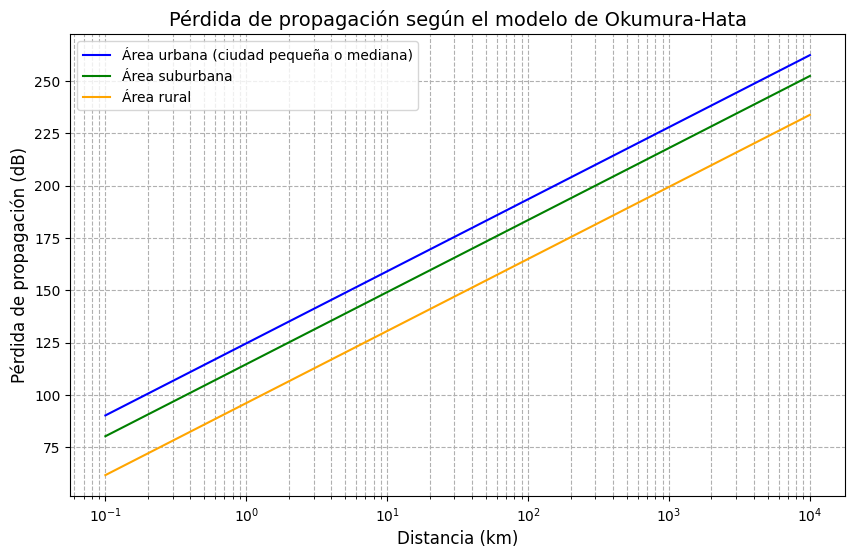

In [13]:
# Generar la tabla de Markdown para los resultados de las primeras 5 distancias
markdown_output_oh = "# Resultados para las primeras 5 distancias\n\n"
markdown_output_oh += "| Usuario | Distancia (km) | Pérdida Urbana (dB) | Pérdida Suburbana (dB) | Pérdida Rural (dB) |\n"
markdown_output_oh += "|---------|----------------|---------------------|------------------------|-------------------|\n"

# Generar las filas de la tabla con los resultados
for i in range(5):
    markdown_output_oh += f"| {i+1} | {d_m_range[i]:.4f} km | {Lb_urban[i]:.2f} dB | {Lb_suburban[i]:.2f} dB | {Lb_rural[i]:.2f} dB |\n"

# Mostrar el markdown generado en Jupyter Notebook
display(Markdown(markdown_output_oh))

# Grafica de las pérdidas en función de la distancia (log-log)
plt.figure(figsize=(10, 6))
plt.plot(
    d_m_range, Lb_urban, label="Área urbana (ciudad pequeña o mediana)", color="blue"
)
plt.plot(d_m_range, Lb_suburban, label="Área suburbana", color="green")
plt.plot(d_m_range, Lb_rural, label="Área rural", color="orange")

# Configuración de la gráfica
plt.xscale("log")
plt.yscale("linear")
plt.xlabel("Distancia (km)", fontsize=12)
plt.ylabel("Pérdida de propagación (dB)", fontsize=12)
plt.title("Pérdida de propagación según el modelo de Okumura-Hata", fontsize=14)
plt.grid(True, which="both", ls="--")
plt.legend()
plt.show()

### Calculo de la perdida para cada usuario y la potencia recibida para cada usuario

In [14]:
# Cambiamos el meshgrid de -2000 a 2000 en 100 por -2000 a 2000 en 100 
x, y = np.meshgrid(np.arange(-2000, 2001, 100), np.arange(-2000, 2001, 100))

# Calcular la distancia con la formula de espacio libre de O-H

In [15]:
def distance_oh(l_db, f, h_b, h_m):
    """Distancia de Okumura-Hata."""
    return 10 ** (
        (
            (l_db - 69.55 - 26.16 * np.log10(f) + 13.82 * np.log10(h_b) + h_m)
            / (44.9 - 6.55 * np.log10(h_b))
        )
    )

In [16]:
# Parametros para las formulas de las perdidas totales
# L_fsl : Perdida en el espacio libre (dB)
# A_mu : median attenuation (dB)
# H_mg : mobile station antenna height gain factor
# H_bg : base station antenna height gain factor

# Calculo para el tipo de perdida de propagación urbana
Lb_urban_2 = urban_loss(f, h_b, h_m, d, large_city=False)

# Calculo para el tipo de perdida de propagación suburbana
Lb_suburban_2 = suburban_loss(f, Lb_urban)

# Calculo para el tipo de perdida de propagación rural
Lb_rural_2 = rural_loss(f, Lb_urban)

# Calculo de la perdida total en zona urbana
L_total_urban = L_fsl + Lb_urban_2

# Potencias recibidas para cada tipo de perdida
Prx_usuarios_urban = Ptx + G_users - L_total_urban + Grx

# Generar la tabla de Markdown para los resultados de las primeras 5 distancias
markdown_output_losses = "# Resultados para las primeras 5 distancias\n\n"
markdown_output_losses += "|Usuario| Distancia (km) | L_fsl (dB) | Pérdida Urbana (dB) | Pérdida Suburbana (dB) | Pérdida Rural (dB) | Potencia Recibida (dBm) |\n"
markdown_output_losses += "|-------|--------------|------------|---------------------|------------------------|--------------------|------------------------|\n"

# Calcular perdida maxima 
Prx_usuarios_urban_max = (Prx_usuarios_urban.min()) 
Lb_urban_2_max = (Lb_urban_2.min())
L_fsl_max = Ptx + Gtx + Grx + Prx_usuarios_urban_max
L_total_urban_max = L_fsl_max - Lb_urban_2_max
print("La potencia maxima recibida por un usuario es:", Prx_usuarios_urban_max, "dBm")
print("La perdida maxima es:", L_fsl_max, "dB")
# Generar las filas de la tabla con los resultados
for i in range(5):
    markdown_output_losses += f"| {i+1} | {d[i]:.4f} km | {Lb_urban_2[i]:.2f} dB | {Lb_suburban_2[i]:.2f} dB | {Lb_rural_2[i]:.2f} dB | {Prx_usuarios_urban[i]:.2f} dBm |\n"

# Mostrar el markdown generado en Jupyter Notebook
display(Markdown(markdown_output_losses))

La potencia maxima recibida por un usuario es: -109.15177289456219 dBm
La perdida maxima es: -49.151772894562185 dB


# Resultados para las primeras 5 distancias

|Usuario| Distancia (km) | L_fsl (dB) | Pérdida Urbana (dB) | Pérdida Suburbana (dB) | Pérdida Rural (dB) | Potencia Recibida (dBm) |
|-------|--------------|------------|---------------------|------------------------|--------------------|------------------------|
| 1 | 47.7729 km | 182.45 dB | 80.33 dB | 61.76 dB | -109.15 dBm |
| 2 | 47.3630 km | 182.32 dB | 80.76 dB | 62.19 dB | -109.03 dBm |
| 3 | 46.9707 km | 182.20 dB | 81.19 dB | 62.63 dB | -108.92 dBm |
| 4 | 46.5967 km | 182.08 dB | 81.62 dB | 63.06 dB | -108.81 dBm |
| 5 | 46.2412 km | 181.96 dB | 82.05 dB | 63.49 dB | -108.71 dBm |


In [17]:
# Parámetros
f = 900  # Frecuencia en MHz
h_b = 40  # Altura de la antena de la estación base en metros
h_m = 1.5  # Altura de la antena móvil en metros
L_fsl = 162  # Pérdida en espacio libre de 162 dB
def distance_oh(L_fsl, Lb_area, f, h_b, h_m):
    """Cálculo de la distancia inversa usando la fórmula de Okumura-Hata."""
    return 10 ** ((L_fsl - Lb_area - 69.55 - 26.16 * np.log10(f) + 13.82 * np.log10(h_b)) / (44.9 - 6.55 * np.log10(h_b)))



# Calcular la pérdida en cada tipo de área
Lb_urban = urban_loss(f, h_b, h_m, 1)  # Se calcula en base a una distancia de 1 km
Lb_suburban = suburban_loss(f, Lb_urban)
Lb_rural = rural_loss(f, Lb_urban)

# Calcular las distancias máximas usando la pérdida de espacio libre como límite
d_urban_max = distance_oh(L_fsl, 0, f, h_b, h_m)  # Urbana: no hay corrección adicional
d_suburban_max = distance_oh(L_fsl, Lb_suburban - Lb_urban, f, h_b, h_m)  # Suburbana
d_rural_max = distance_oh(L_fsl, Lb_rural - Lb_urban, f, h_b, h_m)  # Rural

# Resultados
print(f"Distancia máxima en área urbana: {d_urban_max:.2f} km")

print(f"Distancia máxima en área suburbana: {d_suburban_max:.2f} km")
print(f"Distancia máxima en área rural: {d_rural_max:.2f} km")


Distancia máxima en área urbana: 12.14 km
Distancia máxima en área suburbana: 23.62 km
Distancia máxima en área rural: 81.82 km


In [18]:
# Hallando R_max por pitagoras
# Convertir h_b a km
h_b_km = h_b / 1000
# Calcular R_max
r_max_rural = np.sqrt(d_rural_max ** 2 + h_b_km ** 2)
r_max_urban = np.sqrt(d_urban_max ** 2 + h_b_km ** 2)
r_max_suburban = np.sqrt(d_suburban_max ** 2 + h_b_km ** 2)

# Resultados
print(f"R_max en área urbana: {r_max_urban:.2f} km")
print(f"R_max en área suburbana: {r_max_suburban:.2f} km")
print(f"R_max en área rural: {r_max_rural:.2f} km")



R_max en área urbana: 12.14 km
R_max en área suburbana: 23.62 km
R_max en área rural: 81.82 km


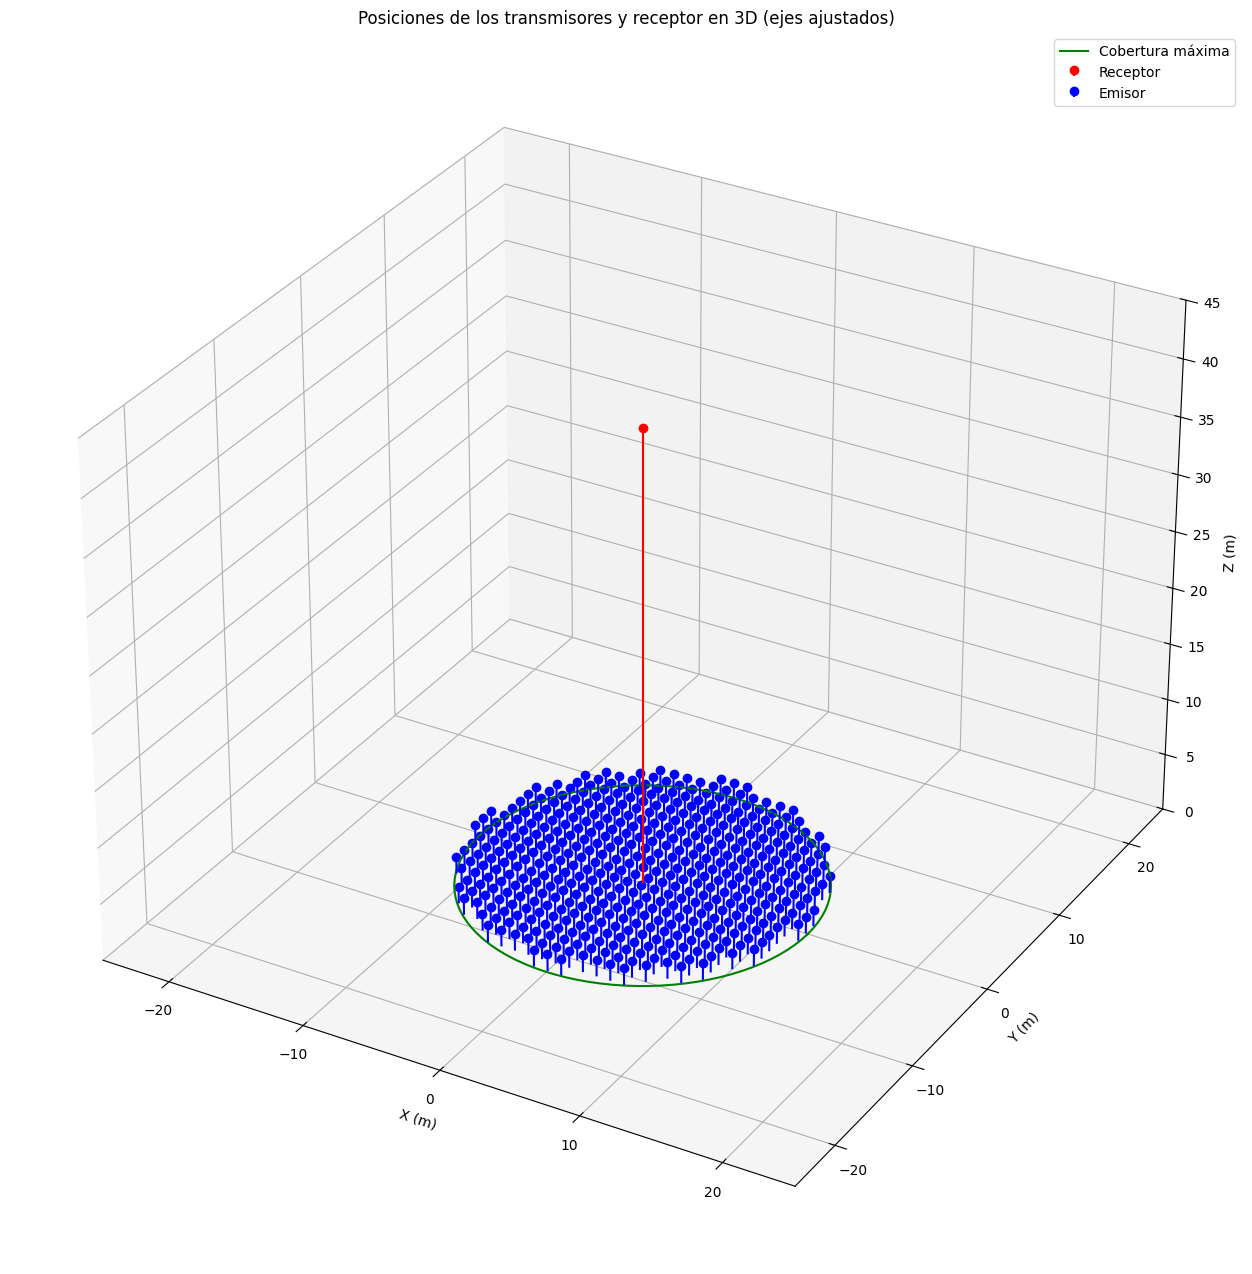

emisores_dentro [[ -1.  -12.    1.5]
 [  0.  -12.    1.5]
 [  1.  -12.    1.5]
 ...
 [ -1.   12.    1.5]
 [  0.   12.    1.5]
 [  1.   12.    1.5]]


In [19]:
# Calcular las distancias entre cada emisor y el receptor
distancias = np.sqrt((p_em[:, 0] - p_rb[0])**2 + (p_em[:, 1] - p_rb[1])**2)

# Filtrar emisores que están dentro del radio máximo
r_max = r_max_urban  # Definir un radio de cobertura máximo en metros (ajústalo según tus necesidades)
emisores_dentro = p_em[distancias <= r_max]

# Eliminar los emisores que están fuera del radio de cobertura máximo
emisores_fuera = p_em[distancias > r_max]

# Graficar los emisores y receptor en 3D usando stem
fig = plt.figure(figsize=(16, 16))
ax = fig.add_subplot(111, projection='3d')

# Graficar el receptor
ax.stem([p_rb[0]], [p_rb[1]], [p_rb[2]], linefmt='r-', markerfmt='ro', basefmt=' ', label='Receptor')

# Graficar emisores dentro del radio de cobertura
ax.stem(emisores_dentro[:, 0], emisores_dentro[:, 1], emisores_dentro[:, 2], linefmt='b-', markerfmt='bo', basefmt=' ', label='Emisor')

# Ajustar los límites de los ejes para una mejor visualización
ax.set_xlim(-25, 25)
ax.set_ylim(-25, 25)
ax.set_zlim(0, 45)

# Dibujar el círculo de cobertura máxima en el plano XY
theta = np.linspace(0, 2 * np.pi, 100)
x_circulo = r_max * np.cos(theta)
y_circulo = r_max * np.sin(theta)
ax.plot(x_circulo, y_circulo, 0, color='g', label='Cobertura máxima')

# Etiquetas y título
ax.set_xlabel('X (m)')
ax.set_ylabel('Y (m)')
ax.set_zlabel('Z (m)')
ax.set_title('Posiciones de los transmisores y receptor en 3D (ejes ajustados)')

plt.grid(True)
plt.legend()
plt.show()

print("emisores_dentro", emisores_dentro)


In [20]:
# Definir el área de cobertura en kilómetros (100 km x 100 km)
area_size = 100.0  # Área en kilómetros

r_max = r_max_urban

# Parámetros de la cuadrícula hexagonal
grid_spacing = 2.39 * r_max * np.sqrt(3)/2  # Espaciado entre los centros de los círculos (0.866 = sqrt(3)/2)

# Generar una cuadrícula hexagonal de posiciones de emisores
x_range = np.arange(-area_size/2, area_size/2 + grid_spacing, grid_spacing)
y_range = np.arange(-area_size/2, area_size/2 + grid_spacing * 0.75, grid_spacing * 0.75)

emisores = []
for i, x in enumerate(x_range):
    for j, y in enumerate(y_range):
        if j % 2 == 0:
            x_pos = x  # Filas pares sin desplazamiento
        else:
            x_pos = x + grid_spacing / 2  # Filas impares desplazadas la mitad del espaciado
        # Filtrar los emisores que están dentro o ligeramente fuera del área rectangular para rellenar huecos
        if -area_size/2 <= x_pos <= area_size/2 + grid_spacing/2 and -area_size/2 <= y <= area_size/2:
            emisores.append([x_pos, y])

emisores = np.array(emisores)

# Crear la figura
fig = go.Figure()

# Añadir los emisores como puntos
fig.add_trace(go.Scatter(
    x=emisores[:, 0],
    y=emisores[:, 1],
    mode='markers',
    marker=dict(size=8, color='blue'),
    name='Antenas'
))

# Añadir los círculos de cobertura de los emisores
theta = np.linspace(0, 2 * np.pi, 100)
for emisor in emisores:
    x_circulo = emisor[0] + r_max * np.cos(theta)
    y_circulo = emisor[1] + r_max * np.sin(theta)
    fig.add_trace(go.Scatter(
        x=x_circulo,
        y=y_circulo,
        mode='lines',
        line=dict(color='green', dash='dash'),
        showlegend=False
    ))

# Dibujar el rectángulo que representa los márgenes del área de cobertura
rect_x = [-area_size/2, area_size/2, area_size/2, -area_size/2, -area_size/2]
rect_y = [-area_size/2, -area_size/2, area_size/2, area_size/2, -area_size/2]

fig.add_trace(go.Scatter(
    x=rect_x,
    y=rect_y,
    mode='lines',
    line=dict(color='red', width=2),
    name='Margen del área'
))

# Configurar la vista de la gráfica
fig.update_layout(
    title='Cobertura de Emisores en 2D con Márgenes (en km)',
    xaxis_title='X (km)',
    yaxis_title='Y (km)',
    xaxis=dict(scaleanchor="y", scaleratio=1),
    yaxis=dict(),
    legend=dict(x=0, y=1),
    width=800,
    height=800
)


# Ajustar los límites de los ejes
fig.update_xaxes(range=[-area_size/2-30, area_size/2+30])
fig.update_yaxes(range=[-area_size/2-30, area_size/2+30])

fig.show()

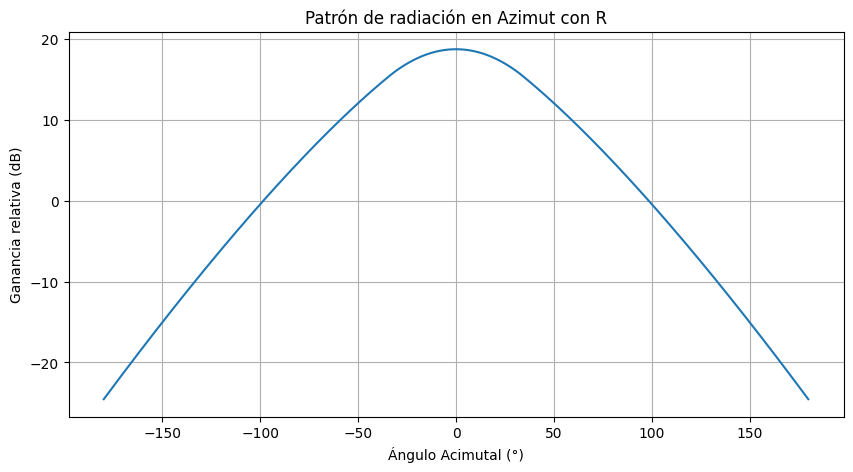

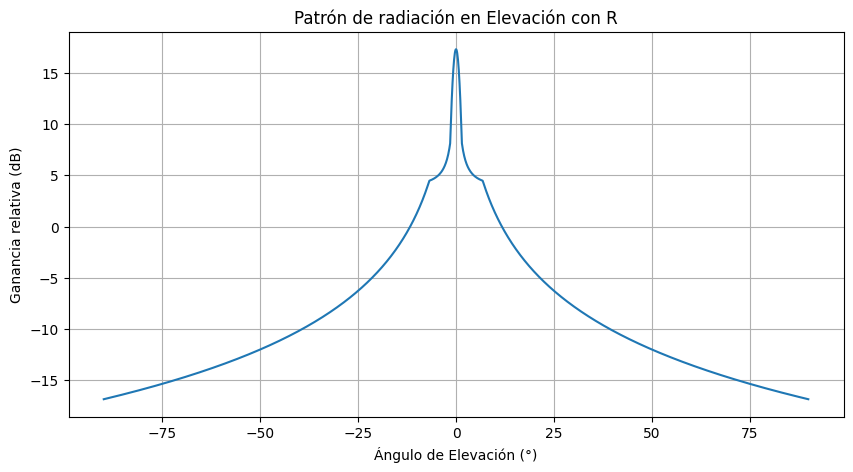

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
G0 = 18  # Ganancia de referencia

# Parametros azimutales
phi_3 = 65  # Ángulo de apertura en acimut (en grados)
theta = np.arange(-180, 180.1, 0.1)  # Ángulos azimutales
kh = 0.7  # Factor de ajuste del diagrama azimutal
lambda_kh = 3 * (1 - 0.5 ** (-kh))  # Cálculo de lambda_kh

# Parametros de elevacion
phi = np.arange(-90, 90.1, 0.1)  # Ángulos de elevación
kv = 0.7  # Factor de ajuste en elevación
# Cálculo de theta_3 (con el nombre correcto)
theta_3 = 107.6 * 10 ** (-0.1 * G0)


# Parámetros adicionales para el ajuste en elevación
kp = 0.7  # Valor para el ajuste en compresión


# Cálculo de Ghr (Ganancia en el plano azimutal)
def Ghr(theta, phi_3, kh, lambda_kh):
    xh = np.abs(theta) / phi_3
    if xh <= 0.5:
        return -12 * (xh**2)
    elif 0.5 < xh:
        return -12 * (xh ** (2 - kh)) - lambda_kh


# Definición de Gvr
def Gvr(phi, kv, theta_3, kp):
    C = calculate_C(theta_3, kp, kv)
    lambda_kv = calculate_lambda_kv(C, kv)
    xk = np.sqrt(1 - 0.36 * kv)
    xv = np.abs(phi) / theta_3
    if xv < xk:
        return -12 * (xv**2)
    elif xk <= xv < 4:
        return -12 + 10 * np.log10(xv**-1.5 + kv)
    elif 4 <= xv < (90 / theta_3):
        return -lambda_kv - C * np.log10(xv)
    else:
        return -lambda_kv - C * np.log10(
            90 / theta_3
        )  # Asumiendo que este es el caso de G_180


# Cálculo de lambda_kv
def calculate_lambda_kv(C, kv):
    return 12 - C * np.log10(4) - 10 * np.log10(4**-1.5 + kv)


# Cálculo de C
def calculate_C(theta_3, kp, kv):
    num = 10 * np.log10(((180 / theta_3) ** 1.5) * (4**-1.5 + kv) / (1 + 8 * kp))
    denom = np.log10(22.5 / theta_3)
    return num / denom


# Cálculo de la relación de compresión R (Relación entre ganancia acimutal y elevacional)
def R(phi_3, kv):
    # Utilizamos los valores para theta=0 y phi=180 en la fórmula de compresión
    Ghr_0 = Ghr(0, phi_3, kh, lambda_kh)
    Ghr_180 = Ghr(180, phi_3, kh, lambda_kh)
    Gvr_0 = Ghr(0, kv, theta_3, kp)
    Gvr_180 = Ghr(180, kv, theta_3, kp)

    # Calcular R según la ecuación 2a2
    return (Ghr_0 - Ghr_180) / (Gvr_0 - Gvr_180)


# Calcular los valores de Ghr y Gvr para cada ángulo
Ghr_values = np.array([Ghr(t, phi_3, kh, lambda_kh) for t in theta])
Gvr_values = np.array([Gvr(p, kv, theta_3, kp) for p in phi])

# Cálculo de la relación R
R_value = R(phi_3, kv)  # El valor de R es constante en toda la gráfica

# Calcular G total incluyendo R
G_total_acimut = G0 + Ghr_values + R_value
G_total_elevacion = G0 + Gvr_values - R_value

# Graficar el patrón de radiación en Acimut
plt.figure(figsize=(10, 5))
plt.plot(theta, G_total_acimut)
plt.title("Patrón de radiación en Azimut con R")
plt.xlabel("Ángulo Acimutal (°)")
plt.ylabel("Ganancia relativa (dB)")
plt.grid(True)
plt.show()

# Graficar el patrón de radiación en Elevación
plt.figure(figsize=(10, 5))
plt.plot(phi, G_total_elevacion)
plt.title("Patrón de radiación en Elevación con R")
plt.xlabel("Ángulo de Elevación (°)")
plt.ylabel("Ganancia relativa (dB)")
plt.grid(True)
plt.show()

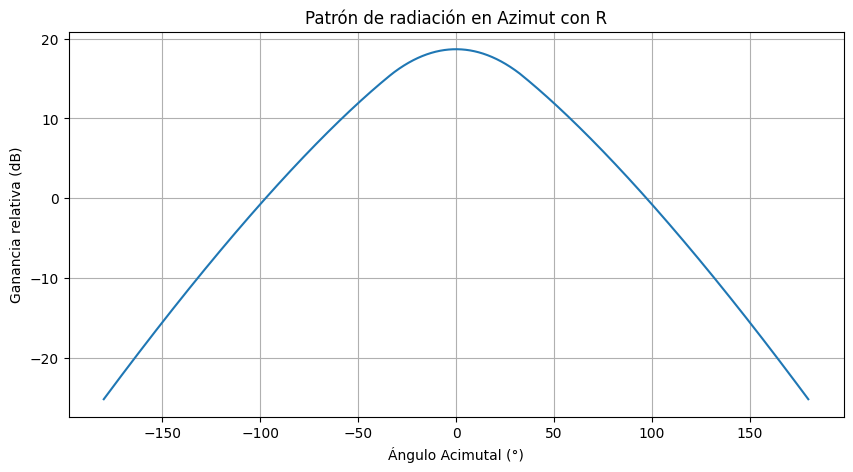

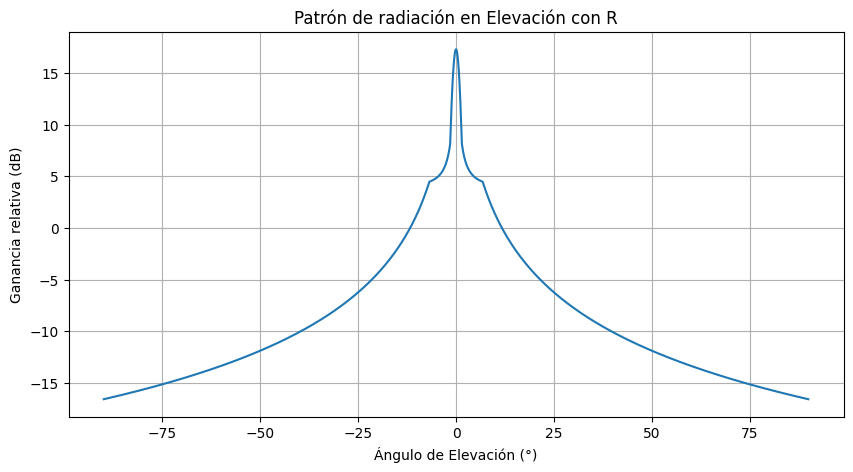

In [54]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
G0 = 18  # Ganancia de referencia

# Parametros azimutales
phi_3 = 65  # Ángulo de apertura en acimut (en grados)
theta = np.arange(-180, 180.1, 0.1)  # Ángulos azimutales
kh = 0.7  # Factor de ajuste del diagrama azimutal
lambda_kh = 3 * (1 - 0.5 ** (-kh))  # Cálculo de lambda_kh

# Parametros de elevacion
phi = np.arange(-90, 90.1, 0.1)  # Ángulos de elevación
kv = 0.7  # Factor de ajuste en elevación
theta_3 = 107.6 * 10 ** (-0.1 * G0)

# Parámetros adicionales para el ajuste en elevación
kp = 0.7  # Valor para el ajuste en compresión

# Cálculo de Ghr (Ganancia en el plano azimutal)
def Ghr(theta, phi_3, kh, lambda_kh):
    xh = np.abs(theta) / phi_3
    result = np.where(xh <= 0.5, -12 * (xh ** 2),
                      -12 * (xh ** (2 - kh)) - lambda_kh)
    return result

# Definición de Gvr
def Gvr(phi, kv, theta_3, kp):
    C = calculate_C(theta_3, kp, kv)
    lambda_kv = calculate_lambda_kv(C, kv)
    xk = np.sqrt(1 - 0.36 * kv)
    xv = np.abs(phi) / theta_3
    result = np.where(
        xv < xk,
        -12 * (xv ** 2),
        np.where(
            xv < 4,
            -12 + 10 * np.log10(xv ** -1.5 + kv),
            -lambda_kv - C * np.log10(xv)
        )
    )
    result[xv >= (90 / theta_3)] = -lambda_kv - C * np.log10(90 / theta_3)
    return result

# Cálculo de lambda_kv
def calculate_lambda_kv(C, kv):
    return 12 - C * np.log10(4) - 10 * np.log10(4 ** -1.5 + kv)

# Cálculo de C
def calculate_C(theta_3, kp, kv):
    num = 10 * np.log10(((180 / theta_3) ** 1.5) * (4 ** -1.5 + kv) / (1 + 8 * kp))
    denom = np.log10(22.5 / theta_3)
    return num / denom

# Cálculo de la relación de compresión R (Relación entre ganancia acimutal y elevacional)
def R(theta, phi_3, kv):
    Ghr_180 = Ghr(180, phi_3, kh, lambda_kh)
    Gvr_0 = Ghr(0, kv, theta_3, kp)
    Gvr_180 = Ghr(180, kv, theta_3, kp)
    return (Ghr(theta, phi_3, kh, lambda_kh) - Ghr_180) / (Gvr_0 - Gvr_180)

# Vectorizar las funciones
Ghr_vectorized = np.vectorize(Ghr)
Gvr_vectorized = np.vectorize(Gvr)

# Calcular los valores de Ghr y Gvr para cada ángulo
Ghr_values = Ghr_vectorized(theta, phi_3, kh, lambda_kh)
Gvr_values = Gvr_vectorized(phi, kv, theta_3, kp)

# Cálculo de la relación R
R_value_azimut = R(theta, phi_3, kv)  # Para el plano de azimut
R_value_elevacion = R(phi, phi_3, kv)  # Para el plano de elevación

# Calcular G total incluyendo R
G_total_acimut = G0 + Ghr_values + R_value_azimut
G_total_elevacion = G0 + Gvr_values - R_value_elevacion

# Graficar el patrón de radiación en Azimut
plt.figure(figsize=(10, 5))
plt.plot(theta, G_total_acimut)
plt.title("Patrón de radiación en Azimut con R")
plt.xlabel("Ángulo Acimutal (°)")
plt.ylabel("Ganancia relativa (dB)")
plt.grid(True)
plt.show()

# Graficar el patrón de radiación en Elevación
plt.figure(figsize=(10, 5))
plt.plot(phi, G_total_elevacion)
plt.title("Patrón de radiación en Elevación con R")
plt.xlabel("Ángulo de Elevación (°)")
plt.ylabel("Ganancia relativa (dB)")
plt.grid(True)
plt.show()


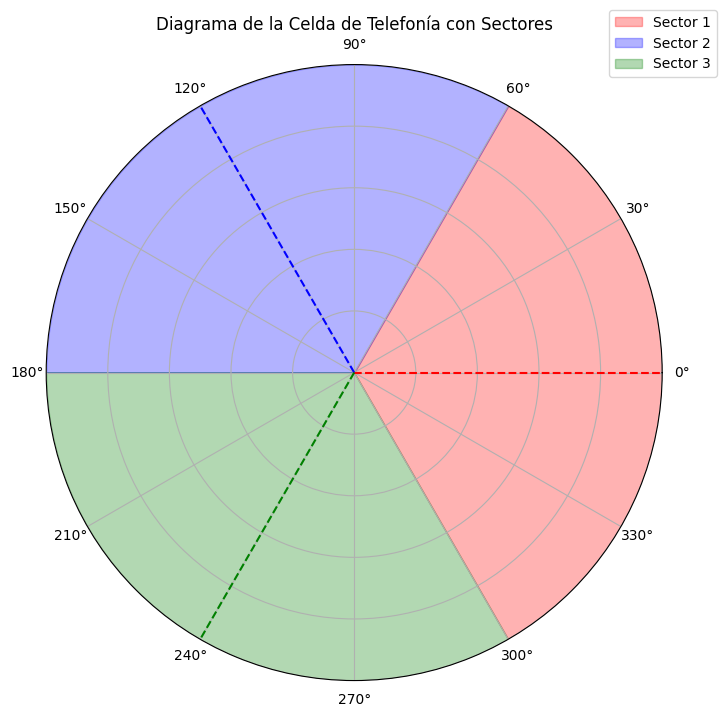

In [60]:
# Parámetros de la celda de telefonía
n_sectores = 3  # Número de sectores
sector_apertura = 120  # Apertura de cada sector en grados
radio_celda = 100  # Radio de la celda (arbitrario para graficar)
colores = ['red', 'blue', 'green']  # Colores para cada sector

# Crear la figura en coordenadas polares
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'projection': 'polar'})

# Dibujar cada sector
for i in range(n_sectores):
    # Ángulo central de cada sector
    angulo_central = i * (360 / n_sectores)
    theta = np.radians(np.linspace(angulo_central - sector_apertura/2, angulo_central + sector_apertura/2, 100))
    r = np.full_like(theta, radio_celda)
    
    # Dibujar el sector en el plano polar
    ax.fill_between(theta, 0, r, color=colores[i], alpha=0.3, label=f"Sector {i+1}")
    
    # Marcar el ángulo central
    ax.plot([np.radians(angulo_central), np.radians(angulo_central)], [0, radio_celda], color=colores[i], linestyle='--')

# Configurar el gráfico
ax.set_ylim(0, radio_celda)
ax.set_yticklabels([])  # Ocultar las etiquetas radiales
ax.set_xticks(np.radians(np.arange(0, 360, 30)))  # Divisiones cada 30 grados
ax.set_title("Diagrama de la Celda de Telefonía con Sectores")
ax.legend(loc="upper right", bbox_to_anchor=(1.1, 1.1))

plt.show()


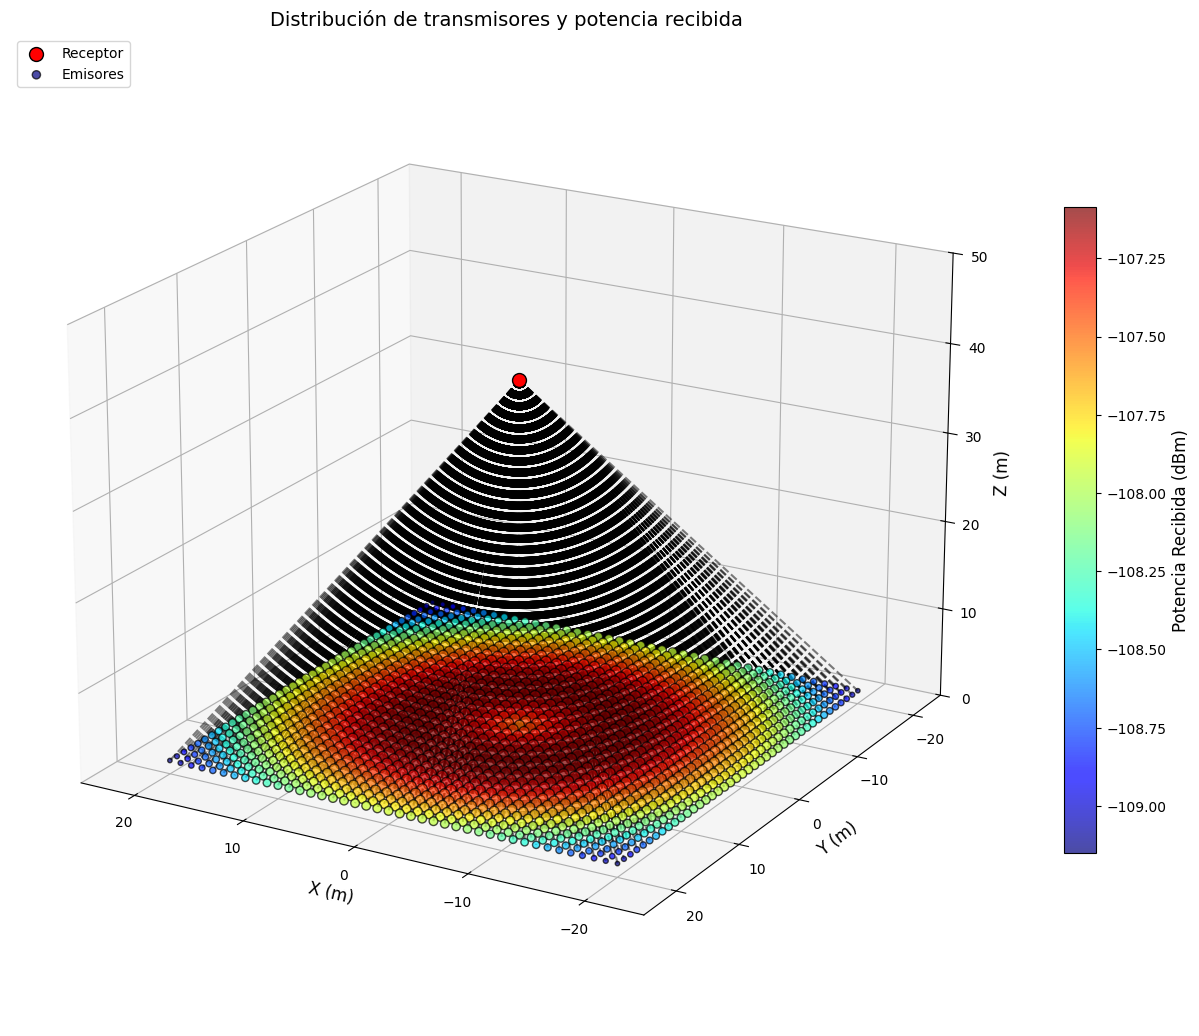

In [22]:
# Gráfico 3D mejorado de posiciones y potencias
fig = plt.figure(figsize=(16, 14))
ax = fig.add_subplot(111, projection="3d")

# Colores y tamaños basados en la potencia recibida
colors = plt.cm.jet(
    (Prx_usuarios_urban - Prx_usuarios_urban.min())
    / (Prx_usuarios_urban.max() - Prx_usuarios_urban.min())
)  # Colores según Prx_usuarios_urban
sizes = (
    50
    * (Prx_usuarios_urban - Prx_usuarios_urban.min())
    / (Prx_usuarios_urban.max() - Prx_usuarios_urban.min())
    + 10
)  # Tamaño de las burbujas según Prx_usuarios_urban

# Graficar el receptor
ax.scatter(
    p_rb[0],
    p_rb[1],
    p_rb[2],
    color="red",
    s=100,
    label="Receptor",
    edgecolor="k",
    depthshade=True,
)

# Graficar los transmisores con colores y tamaños según la potencia recibida
sc = ax.scatter(
    p_em[:, 0],
    p_em[:, 1],
    p_em[:, 2],
    c=Prx_usuarios_urban,
    s=sizes,
    cmap="jet",
    alpha=0.7,
    edgecolor="k",
    label="Emisores",
)

# Dibujar líneas desde el receptor hasta cada transmisor
for i in range(len(p_em)):
    ax.plot(
        [p_rb[0], p_em[i, 0]],
        [p_rb[1], p_em[i, 1]],
        [p_rb[2], p_em[i, 2]],
        "k--",
        alpha=0.5,
    )

# Etiquetas y título
ax.set_xlabel("X (m)", fontsize=12)
ax.set_ylabel("Y (m)", fontsize=12)
ax.set_zlabel("Z (m)", fontsize=12)
ax.set_title("Distribución de transmisores y potencia recibida", fontsize=14)

# Ajustar el rango de los ejes
ax.set_xlim([-25, 25])
ax.set_ylim([-25, 25])
ax.set_zlim([0, 50])

# Ajustar la vista de la cámara
ax.view_init(elev=20, azim=120)

# Barra de color para la escala de potencia
cb = fig.colorbar(sc, ax=ax, shrink=0.6)
cb.set_label("Potencia Recibida (dBm)", fontsize=12)

# Mostrar la leyenda
plt.legend(loc="upper left")

# Mostrar la gráfica
plt.show()

ValueError: cannot reshape array of size 1681 into shape ()

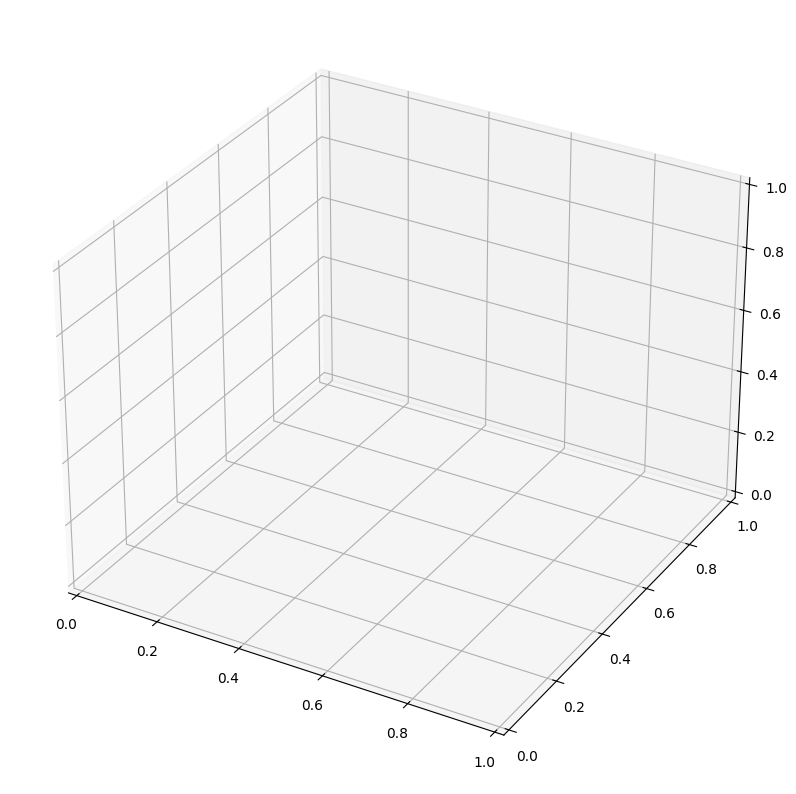

In [23]:
# Crear una gráfica 3D para la potencia recibida
fig = plt.figure(figsize=(10, 12))
ax = fig.add_subplot(111, projection='3d')

# Reshapear la potencia para graficar
Prx_reshaped = Prx_usuarios_urban.reshape(x.shape)

# Graficar superficie de potencia recibida
ax.plot_surface(x, y, Prx_reshaped, cmap='coolwarm', edgecolor='none')

# Configuraciones de la gráfica
ax.set_xlabel('X (metros)')
ax.set_ylabel('Y (metros)')
ax.set_zlabel('Potencia recibida (dBm)')
ax.set_title('Distribución de Potencia Recibida en 3D')

plt.show()

### Fórmulas para el cálculo de las ganancias relativas

1. Fórmula general para el cálculo de la ganancia relativa:

$$
G(\varphi, \theta) = G_0 + G_{hr}(x_h) + R \cdot G_{vr}(x_v) \quad (\text{dBi}) \tag{2a1}
$$
  
2. Relación de compresión de ganancia horizontal conforme el ángulo acimutal se desplaza de \( 0^\circ \) a \( \varphi \), calculado como:

$$
R = \frac{G_{hr}(x_h) - G_{hr}(180^\circ / \varphi_3)}{G_{hr}(0) - G_{hr}(180^\circ / \varphi_3)} \tag{2a2}
$$

### Cálculo de la ganancia mínima relativa (dB)

La ganancia mínima relativa \( G_{180} \) se calcula con la siguiente fórmula:

$$
G_{180} = -12 + 10 \cdot \log(1 + 8 k_p) - 15 \cdot \log \left( \frac{180^\circ}{\theta_3} \right) \tag{2b1}
$$

### Ganancia relativa en el plano acimutal

La ganancia relativa de la antena de referencia en el plano acimutal se expresa como:

$$
G_{hr}(x_h) = -12 x_h^2 \quad \text{para} \quad x_h \leq 0.5
$$

$$
G_{hr}(x_h) = -12 x_h^{(2 - k_h)} - \lambda_{kh} \quad \text{para} \quad 0.5 < x_h \tag{2b2}
$$



In [61]:
# Parámetros definidos previamente
# Ptx, Gtx, Grx, L_total, etc.

# Calcular el ángulo azimutal (φ) para cada transmisor respecto al receptor
# Utilizamos arctan2 para obtener el ángulo en el rango [-180°, 180°]
phi = np.degrees(np.arctan2(p_em[:, 1] - p_rb[1], p_em[:, 0] - p_rb[0]))

# Definir φ_3 y k_h según los parámetros del problema
phi_3 = 65  # Apertura del haz a 3 dB en el plano azimutal (grados)
k_h = 0.7  # Factor de ajuste del diagrama acimutal basado en la fuga de potencia (0 ≤ k_h ≤ 1)

# Calcular λ_{kh} según la fórmula proporcionada
lambda_kh = 3 * (1 - 0.5**k_h)

# Calcular x_h, la relación entre el ángulo azimutal y la apertura del haz a 3 dB
x_h = np.abs(phi) / phi_3

# Inicializar G_hr, la ganancia relativa en el plano acimutal
G_hr = np.zeros_like(x_h)

# Calcular G_{hr}(x_h) según las fórmulas proporcionadas
# Caso 1: Para x_h ≤ 0.5
mask1 = x_h <= 0.5
G_hr[mask1] = -12 * x_h[mask1] ** 2

# Caso 2: Para x_h > 0.5
mask2 = x_h > 0.5
G_hr[mask2] = -12 * x_h[mask2] ** (2 - k_h) - lambda_kh

# Calcular G_hr en φ = 0° y φ = 180°
# Para φ = 0°
G_hr_0 = 0  # Ya que x_h = 0, entonces G_hr(0) = -12 * 0 = 0 dB

# Para φ = 180°
x_h_180 = 180 / phi_3
if x_h_180 <= 0.5:
    G_hr_180 = -12 * x_h_180**2
else:
    G_hr_180 = -12 * x_h_180 ** (2 - k_h) - lambda_kh

# Calcular R, la relación de compresión de ganancia horizontal
numerator = G_hr - G_hr_180
denominator = G_hr_0 - G_hr_180

# Evitar división por cero en el denominador
denominator = np.where(denominator != 0, denominator, np.finfo(float).eps)

R = numerator / denominator

# Calcular G_vr, la ganancia relativa en el plano de elevación
# Ya hemos calculado G_users anteriormente como la ganancia en elevación
# G_vr = G(θ) - G_0
G_vr = G_users - G_0

# Calcular la ganancia total G(φ, θ) para cada usuario
G_total = G_0 + G_hr + R * G_vr

# Calcular la potencia recibida para cada usuario usando las nuevas ganancias
Prx_new = Ptx + G_total - L_total_urban + Grx

# Mostrar los primeros 15 resultados en una tabla para verificar
markdown_output = "# Ganancias y Potencias Recibidas\n\n"
markdown_output += "| Usuario | φ (°) | G_hr (dB) | R | G_vr (dB) | G_total (dB) | Potencia Recibida (dBm) |\n"
markdown_output += "|---------|-------|-----------|---|-----------|--------------|-------------------------|\n"

for i in range(15):
    markdown_output += f"| {i+1} | {phi[i]:.2f} | {G_hr[i]:.2f} | {R[i]:.2f} | {G_vr[i]:.2f} | {G_total[i]:.2f} | {Prx_new[i]:.2f} |\n"

display(Markdown(markdown_output))

# Ganancias y Potencias Recibidas

| Usuario | φ (°) | G_hr (dB) | R | G_vr (dB) | G_total (dB) | Potencia Recibida (dBm) |
|---------|-------|-----------|---|-----------|--------------|-------------------------|
| 1 | -135.00 | -32.19 | 0.30 | -34.22 | -24.60 | -117.53 |
| 2 | -133.53 | -31.75 | 0.31 | -34.31 | -24.51 | -117.24 |
| 3 | -131.99 | -31.29 | 0.32 | -34.39 | -24.42 | -116.95 |
| 4 | -130.36 | -30.81 | 0.33 | -34.47 | -24.32 | -116.66 |
| 5 | -128.66 | -30.31 | 0.34 | -34.55 | -24.22 | -116.38 |
| 6 | -126.87 | -29.78 | 0.36 | -34.63 | -24.12 | -116.10 |
| 7 | -124.99 | -29.23 | 0.37 | -34.70 | -24.01 | -115.83 |
| 8 | -123.02 | -28.66 | 0.38 | -34.77 | -23.89 | -115.55 |
| 9 | -120.96 | -28.06 | 0.39 | -34.84 | -23.77 | -115.29 |
| 10 | -118.81 | -27.44 | 0.41 | -34.90 | -23.64 | -115.02 |
| 11 | -116.57 | -26.79 | 0.42 | -34.96 | -23.50 | -114.77 |
| 12 | -114.23 | -26.13 | 0.44 | -35.01 | -23.36 | -114.51 |
| 13 | -111.80 | -25.44 | 0.45 | -35.06 | -23.22 | -114.27 |
| 14 | -109.29 | -24.73 | 0.47 | -35.10 | -23.07 | -114.02 |
| 15 | -106.70 | -24.01 | 0.48 | -35.14 | -22.91 | -113.79 |


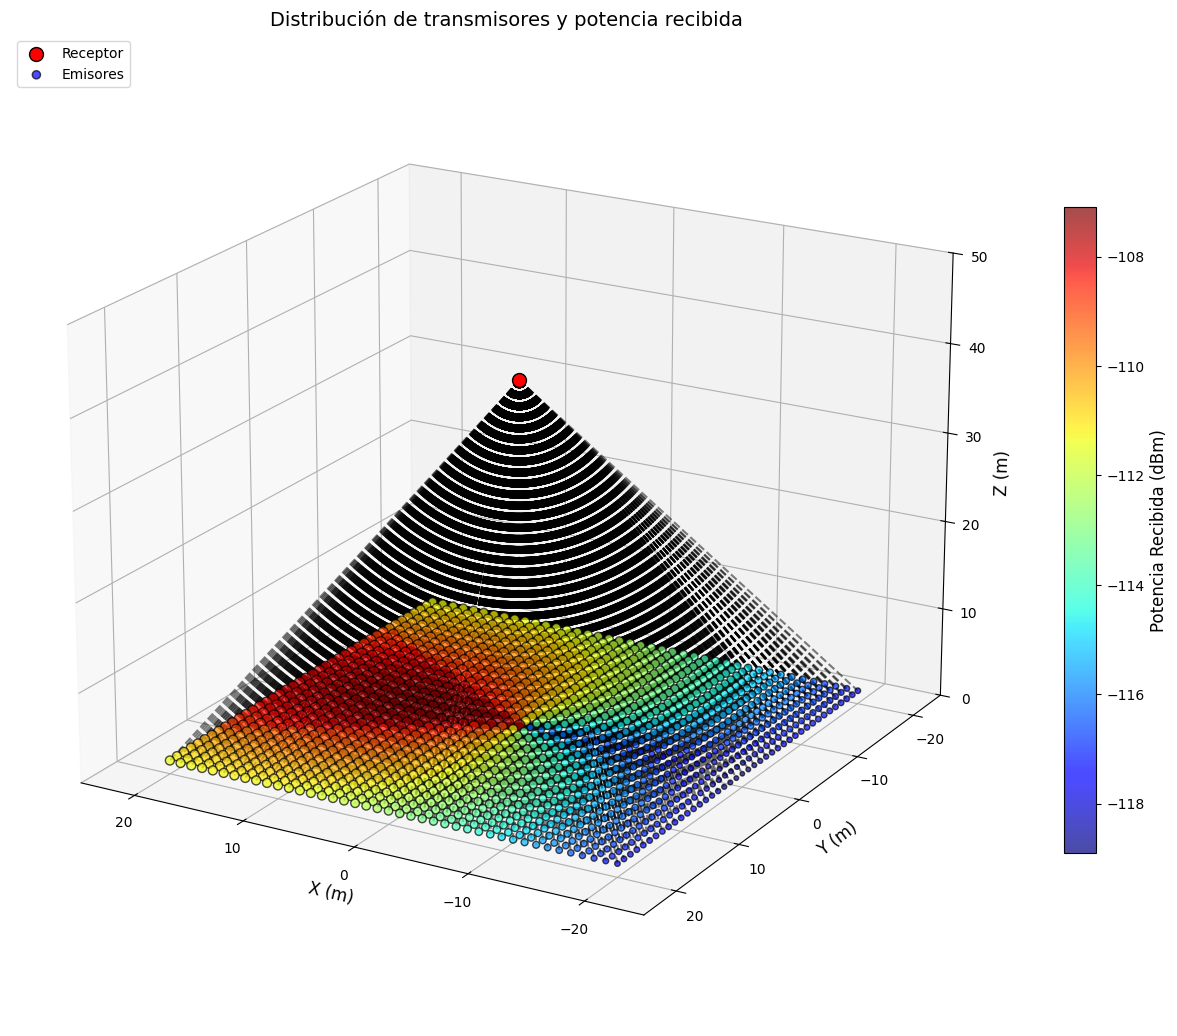

In [62]:
# Calcular los colores y tamaños basados en la potencia recibida (Prx_new)
# Normalizar las potencias para asignar colores y tamaños
Prx_min = Prx_new.min()
Prx_max = Prx_new.max()

# Normalización de las potencias para el rango [0, 1]
Prx_norm = (Prx_new - Prx_min) / (Prx_max - Prx_min)

# Colores según la potencia recibida
colors = plt.cm.jet(Prx_norm)

# Tamaño de las burbujas según la potencia recibida
sizes = 50 * Prx_norm + 10

# Crear la figura y el eje 3D
fig = plt.figure(figsize=(16, 14))
ax = fig.add_subplot(111, projection="3d")

# Graficar el receptor
ax.scatter(
    p_rb[0],
    p_rb[1],
    p_rb[2],
    color="red",
    s=100,
    label="Receptor",
    edgecolor="k",
    depthshade=True,
)

# Graficar los transmisores con colores y tamaños según la potencia recibida
sc = ax.scatter(
    p_em[:, 0],
    p_em[:, 1],
    p_em[:, 2],
    c=Prx_new,
    s=sizes,
    cmap="jet",
    alpha=0.7,
    edgecolor="k",
    label="Emisores",
)

# Dibujar líneas desde cada transmisor hasta el receptor
for i in range(len(p_em)):
    ax.plot(
        [p_rb[0], p_em[i, 0]],
        [p_rb[1], p_em[i, 1]],
        [p_rb[2], p_em[i, 2]],
        "k--",
        alpha=0.5,
    )

# Configurar etiquetas y título
ax.set_xlabel("X (m)", fontsize=12)
ax.set_ylabel("Y (m)", fontsize=12)
ax.set_zlabel("Z (m)", fontsize=12)
ax.set_title("Distribución de transmisores y potencia recibida", fontsize=14)

# Ajustar el rango de los ejes
ax.set_xlim([-25, 25])
ax.set_ylim([-25, 25])
ax.set_zlim([0, 50])

# Ajustar la vista de la cámara
ax.view_init(elev=20, azim=120)

# Añadir una barra de color para la escala de potencia
cb = fig.colorbar(sc, ax=ax, shrink=0.6)
cb.set_label("Potencia Recibida (dBm)", fontsize=12)
ax.legend(loc="upper left")
plt.show()